**Review:**  Figure 7, 33, 34, 42, 43<br>

## Data Collection

**Figure 1** <br>
https://lucid.app/lucidchart/10953892-14ce-4bc7-a54a-f535e87ae6b8/edit?viewport_loc=-487%2C30%2C2560%2C1308%2C0_0&invitationId=inv_9a4c31df-1fa1-4136-99a8-621918b52ff3#

## Topic Modeling

**Figure 11** <br>

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-sx4gas4m because the default path (/home/plarosa/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


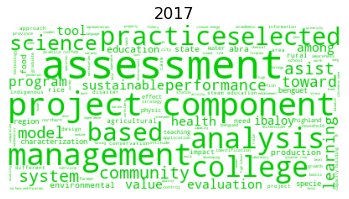

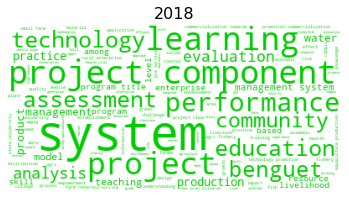

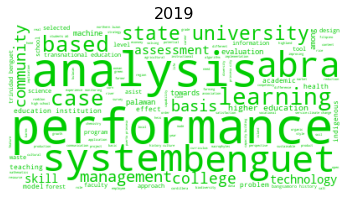

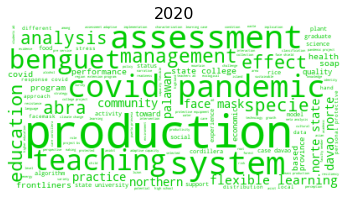

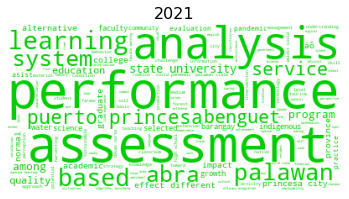

In [1]:
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from utils import *
import os

with open('fig_data/res_prop.pickle', 'rb') as f:
    res_prop = pickle.load(f)


for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        
        wordcloud = (WordCloud(background_color='white',
                               color_func=random_color_func).generate(
            ' '.join(wc_year['Research Title_clean'].dropna())))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year, fontsize=16)
        plt.show()
    except:
        pass

**Figure 12** <br>

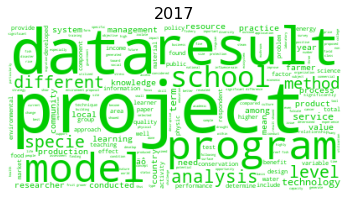

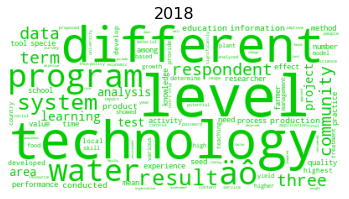

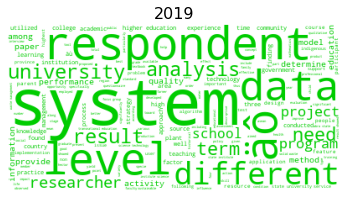

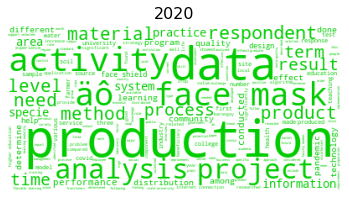

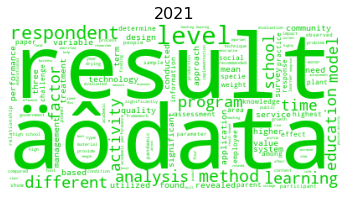

In [2]:
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from utils import *

with open('fig_data/res_prop_abs.pickle', 'rb') as f:
    res_prop = pickle.load(f)


for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        wordcloud = (WordCloud(background_color='white',
                               color_func=random_color_func).generate(
            ' '.join(wc_year['Abstract_clean'].dropna())))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year, fontsize=16)
        plt.show()
    except:
        pass

**Figure 13** <br>

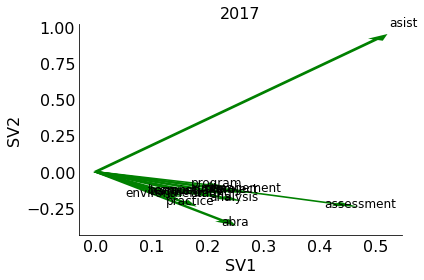

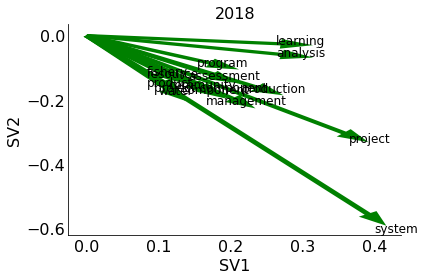

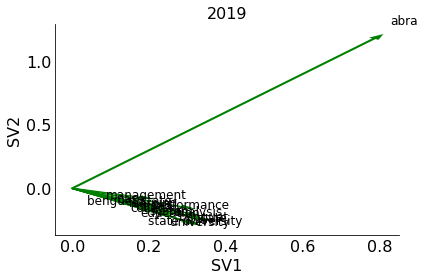

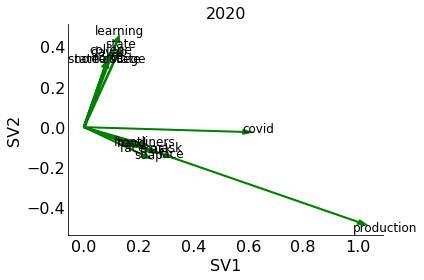

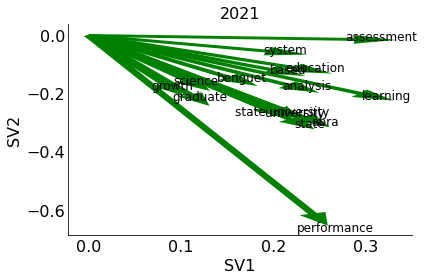

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from utils import *

with open('fig_data/lsa.pickle', 'rb') as f:
    lsa = pickle.load(f)

with open('fig_data/bow_title_all.pickle', 'rb') as f:
    bow_title_all = pickle.load(f)

    
for year in range(2017, 2022):
    x = lsa[year]['X_new']
    p = lsa[year]['p']
    feat_names = bow_title_all[year]
    title = f'{year}'
    plot_lsa(x, p, feat_names, title)

**Figure 14** <br>

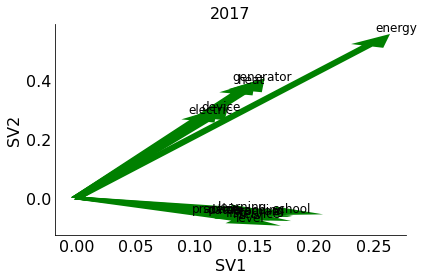

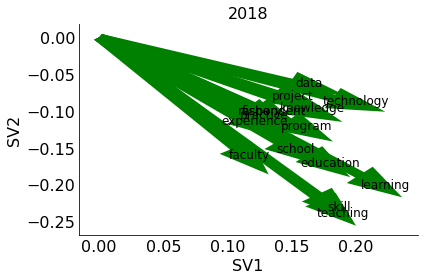

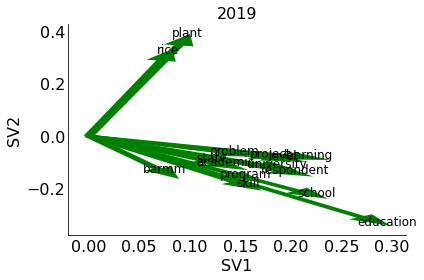

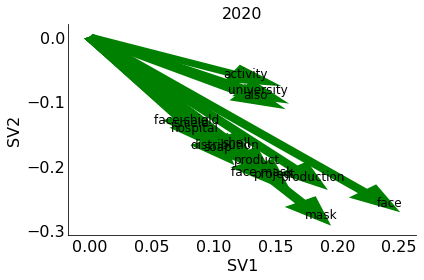

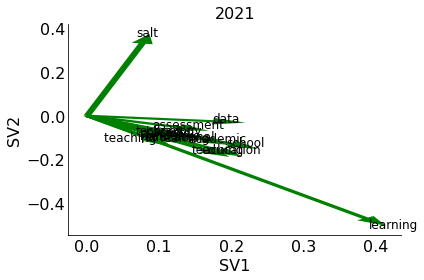

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from utils import *

with open('fig_data/lsa_abs.pickle', 'rb') as f:
    lsa_abs = pickle.load(f)

with open('fig_data/bow_abstract_all.pickle', 'rb') as f:
    bow_abstract_all = pickle.load(f)

    
for year in range(2017, 2022):
    x = lsa_abs[year]['X_new']
    p = lsa_abs[year]['p']
    feat_names = bow_abstract_all[year]
    title = f'{year}'
    plot_lsa(x, p, feat_names, title)

## Predictive Analytics

**Figure 28** <br>

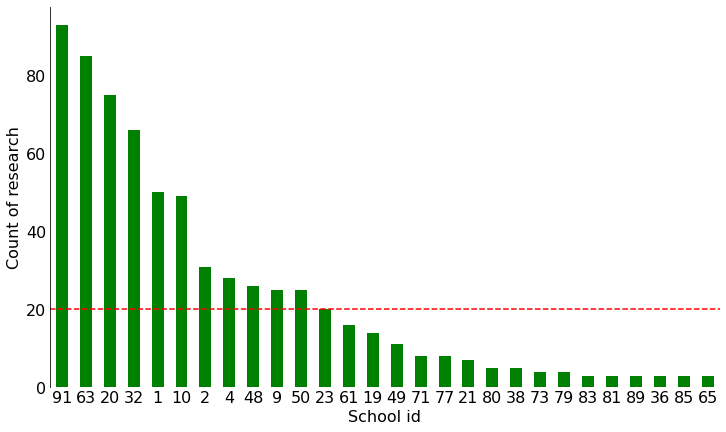

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
from utils import *

with open('fig_data/df_res_spec.pickle', 'rb') as f:
    df = pickle.load(f)

df.school_id.value_counts()[:28].plot.bar(figsize=(12, 7), color='green')
plt.axhline(20, color='red',linestyle='--')
plt.tick_params(axis='both', which='both', length=0)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.xlabel('School id')
plt.xticks(rotation = 0)
plt.ylabel('Count of research')
axes = plt.gca()
axes.set_xlabel('School id', fontsize=16)
axes.set_ylabel('Count of research', fontsize=16)
axes.tick_params(axis='x', labelsize=16)
axes.tick_params(axis='y', labelsize=16);

**Figure 29** <br>

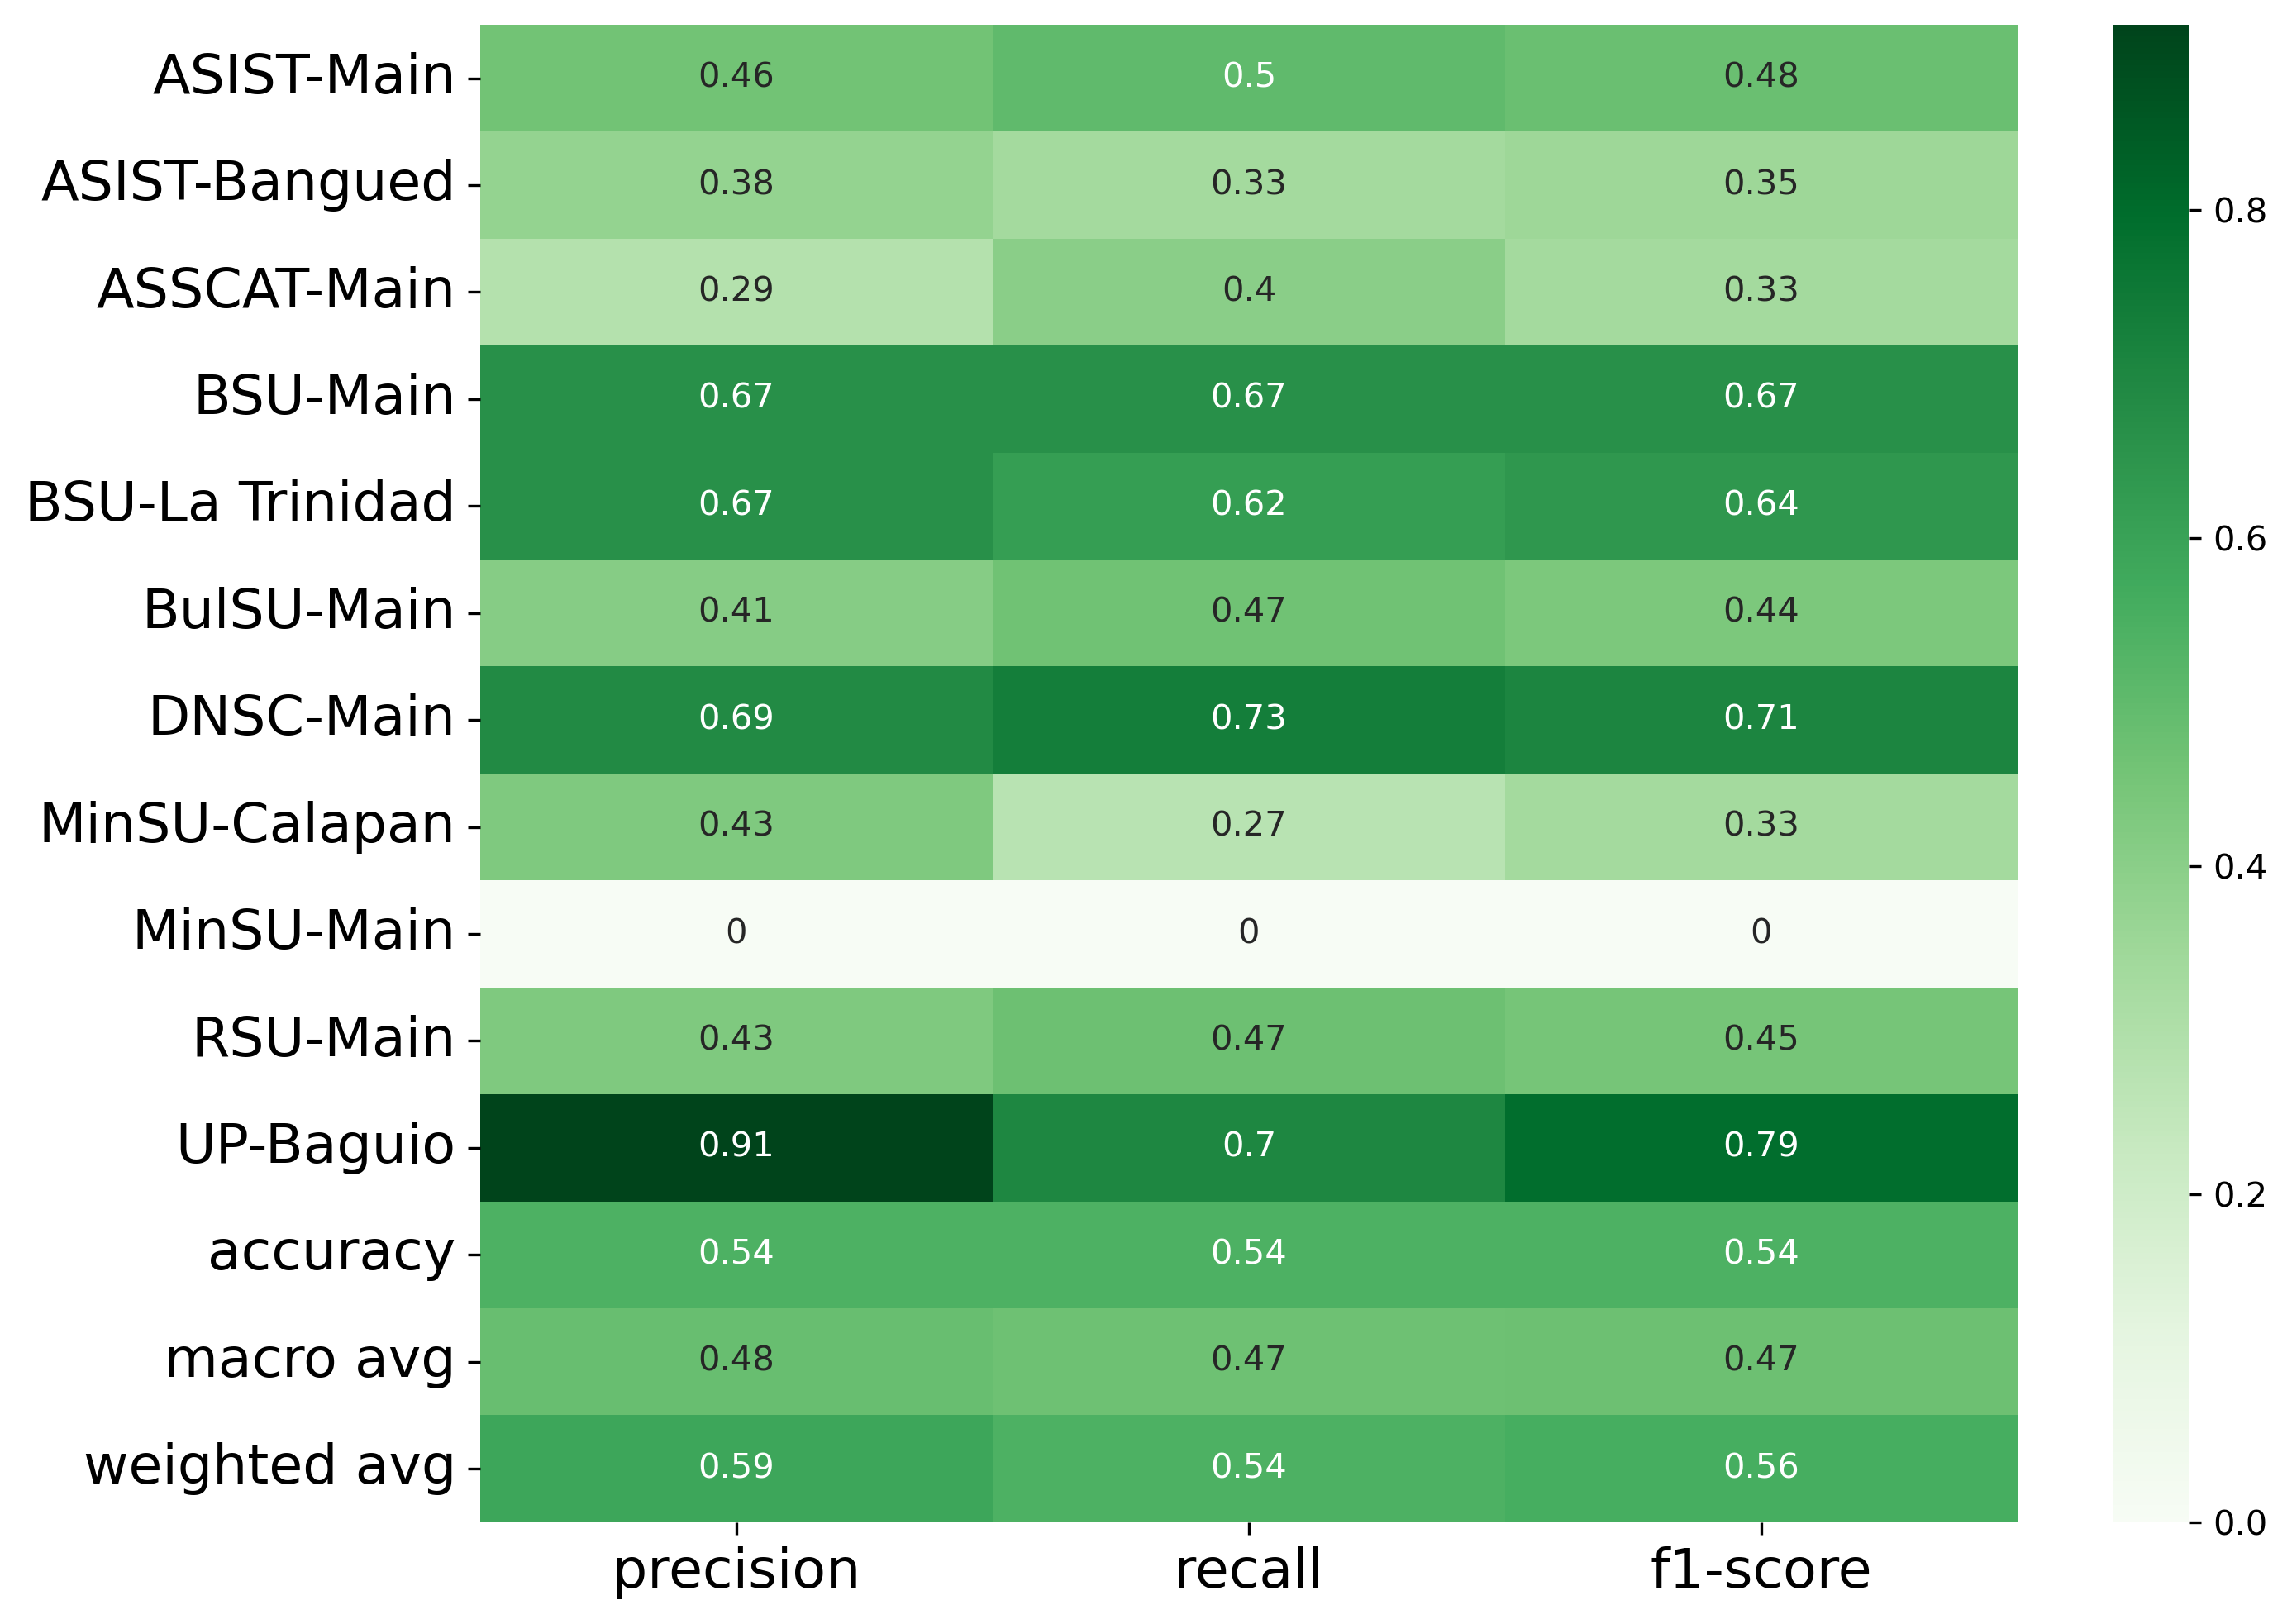

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from utils import *

plt.figure(figsize=(10, 8), dpi=300)
with open('fig_data/clf_report_resspec.pickle', 'rb') as f:
    clf_report = pickle.load(f)
    
clf_report_df = pd.DataFrame(clf_report).iloc[:-1, :].T
clf_report_df.index = [school_mapping[int(col)] 
                       if col not in ['accuracy', 'macro avg', 'weighted avg'] 
                       else col for col in clf_report_df.index]


sns.heatmap(clf_report_df, annot=True, cmap='Greens');
axes = plt.gca()
axes.tick_params(axis='x', labelsize=16)
axes.tick_params(axis='y', labelsize=16)



**Figure 31** <br>

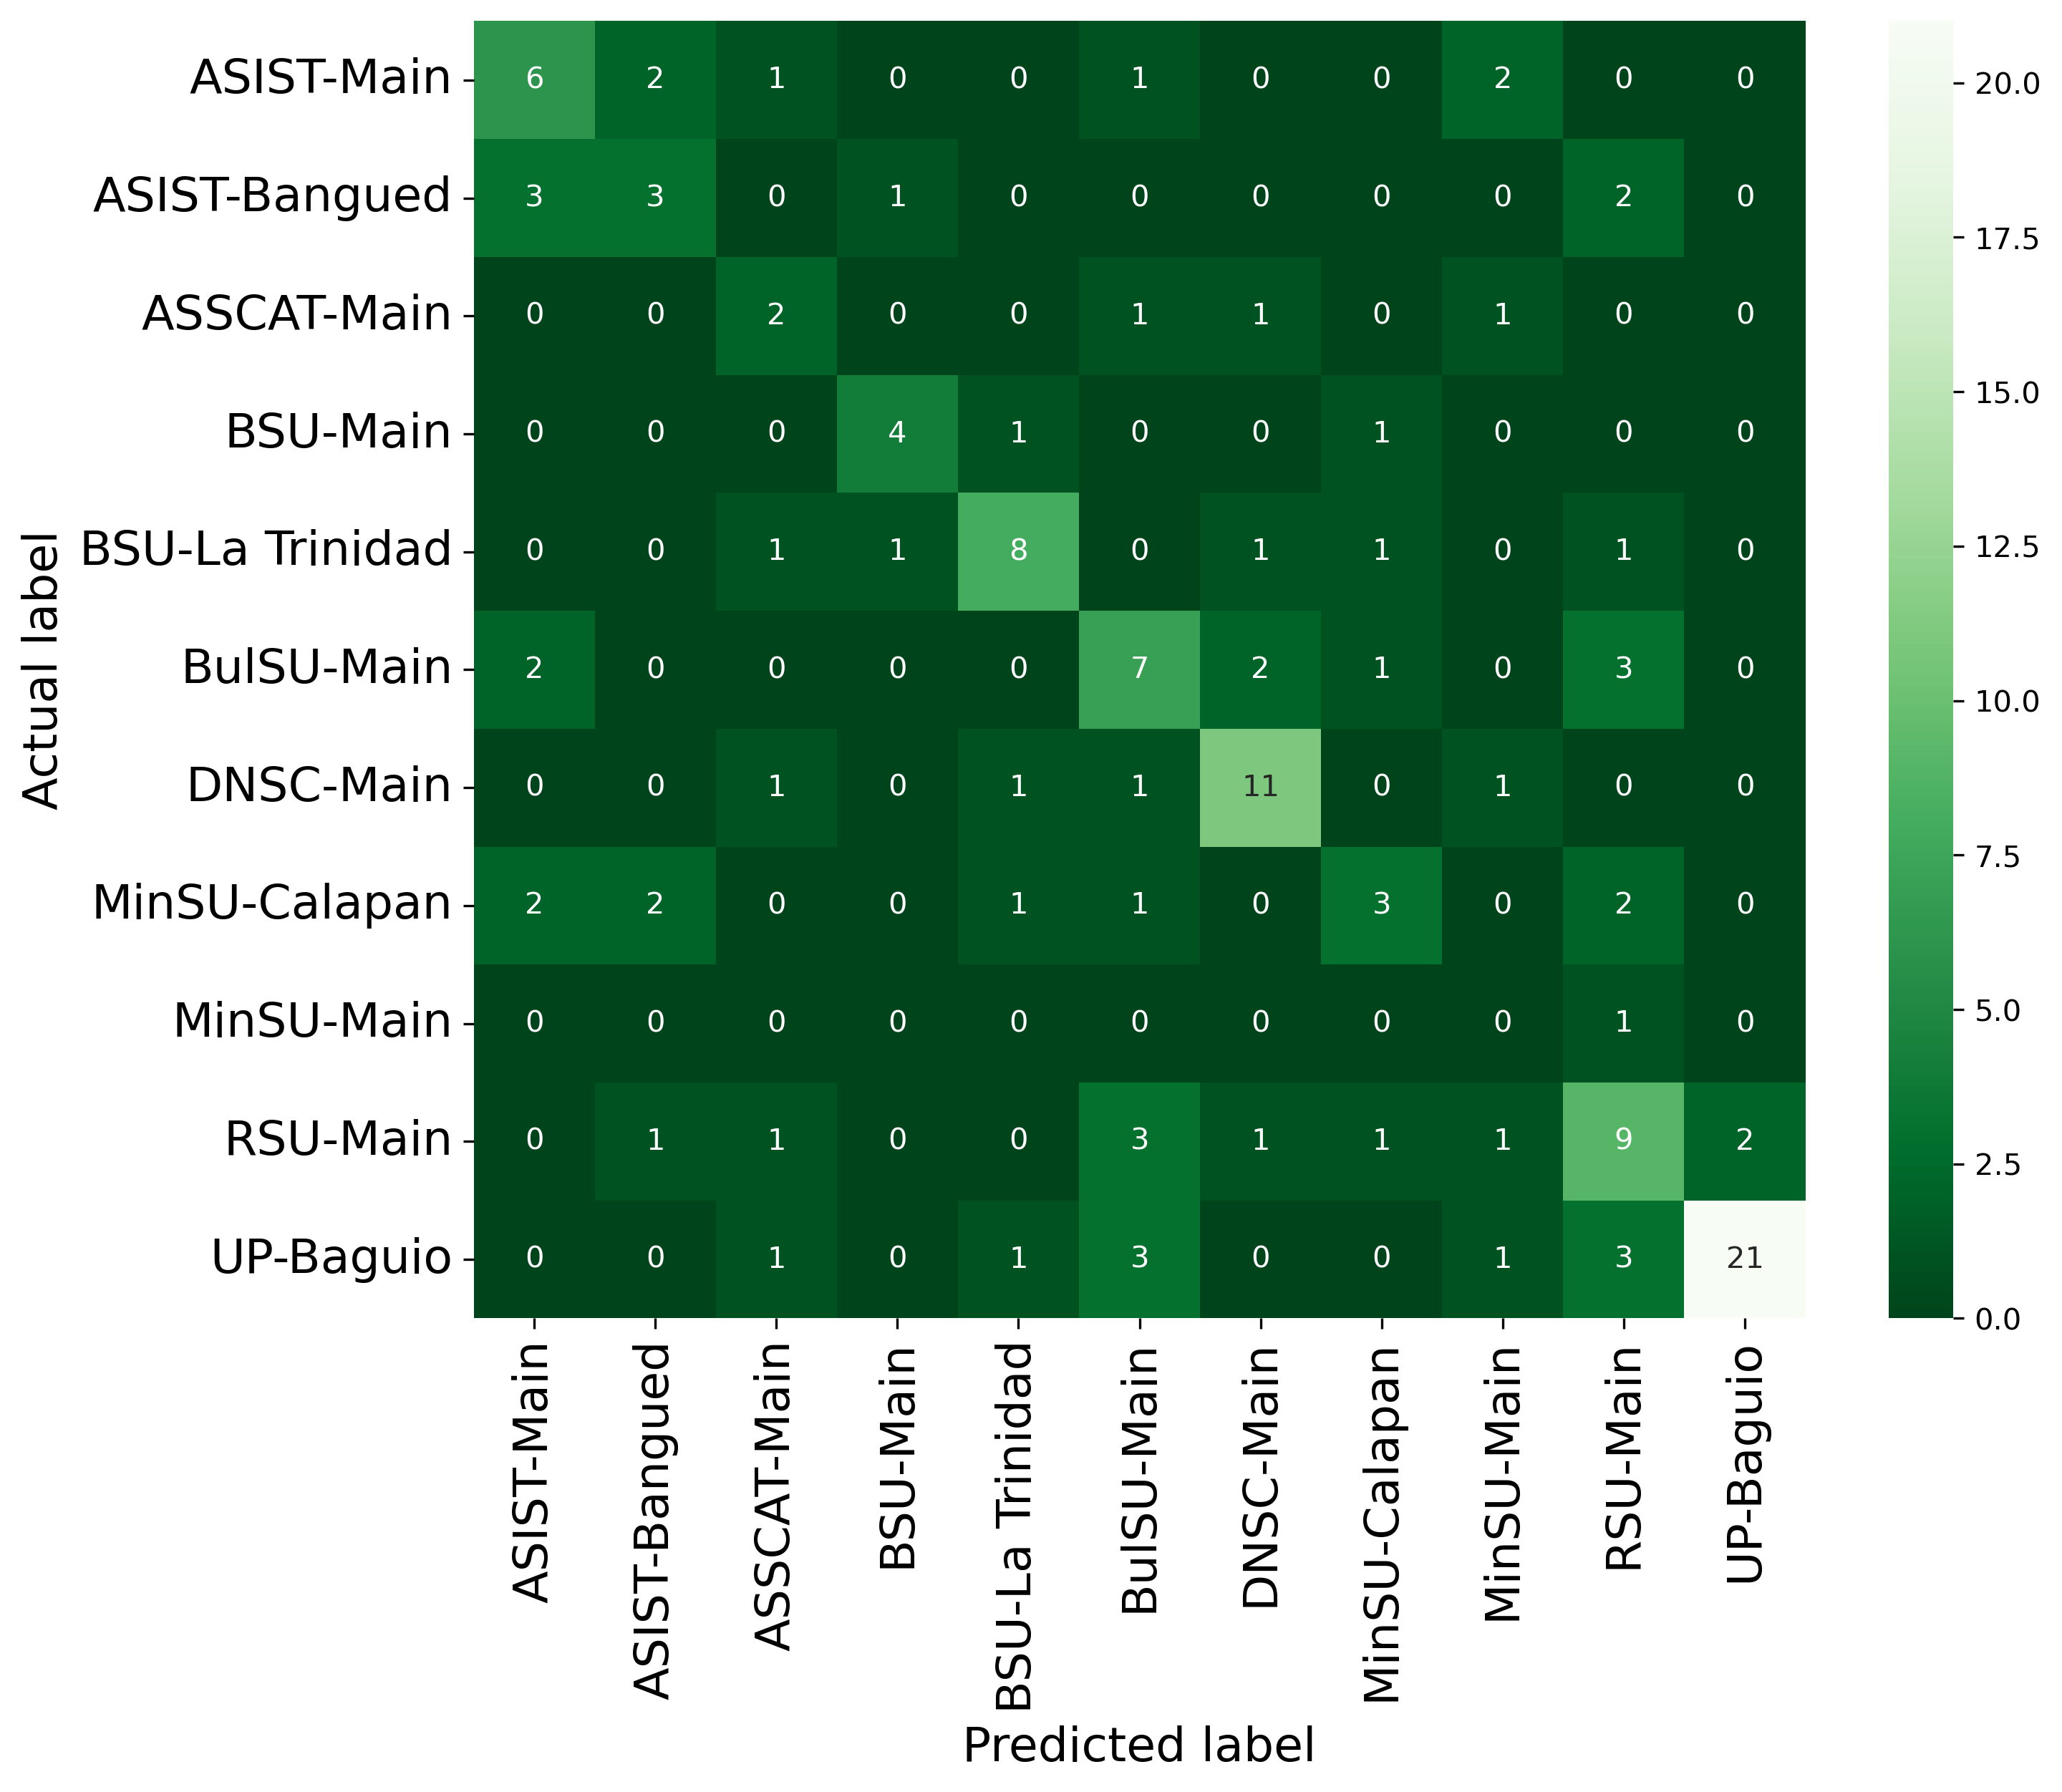

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from utils import *

with open('fig_data/cf_matrix_resspec.pickle', 'rb') as f:
    cf_matrix = pickle.load(f)

plt.figure(figsize=(10, 8), dpi=300)
cf_df = pd.DataFrame(cf_matrix)
cf_df.columns = [school_mapping[col] for col in cf_df.columns]
cf_df.index = [school_mapping[col] for col in cf_df.index]


sns.heatmap(cf_df, annot=True, cmap='Greens_r')
# plt.title('Confusion Matrix')
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('Actual label', fontsize=16)
axes = plt.gca()
axes.tick_params(axis='x', labelsize=16)
axes.tick_params(axis='y', labelsize=16);


**Figure 35** <br>

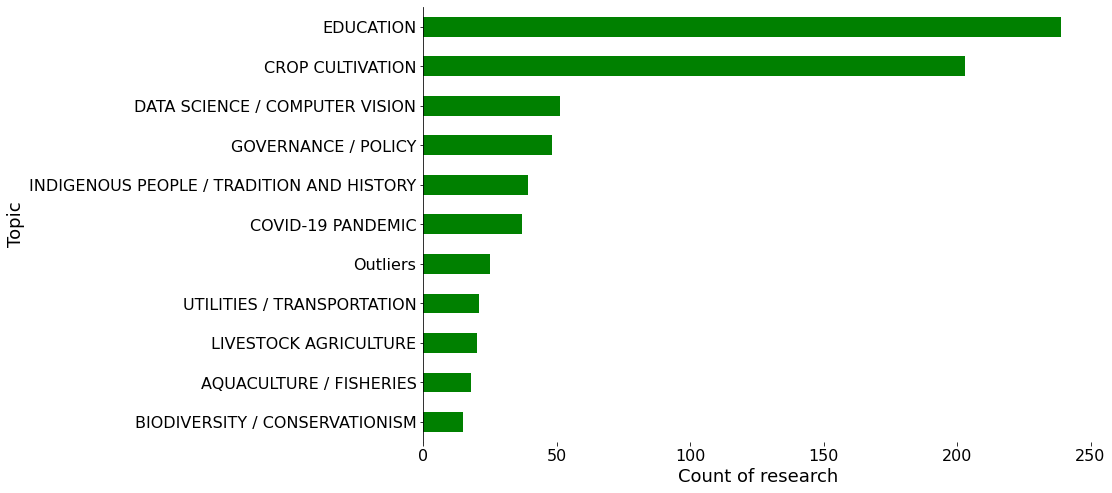

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('fig_data/df_topic_clf.pickle', 'rb') as f:
    df = pickle.load(f)
    
df['Topic Name'].value_counts()[::-1].plot.barh(figsize=(12,8), color='green')
ax = plt.gca()
plt.xticks(rotation = 0)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Topic', fontsize=18)
plt.xlabel('Count of research', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16);

**Figure 36** <br>

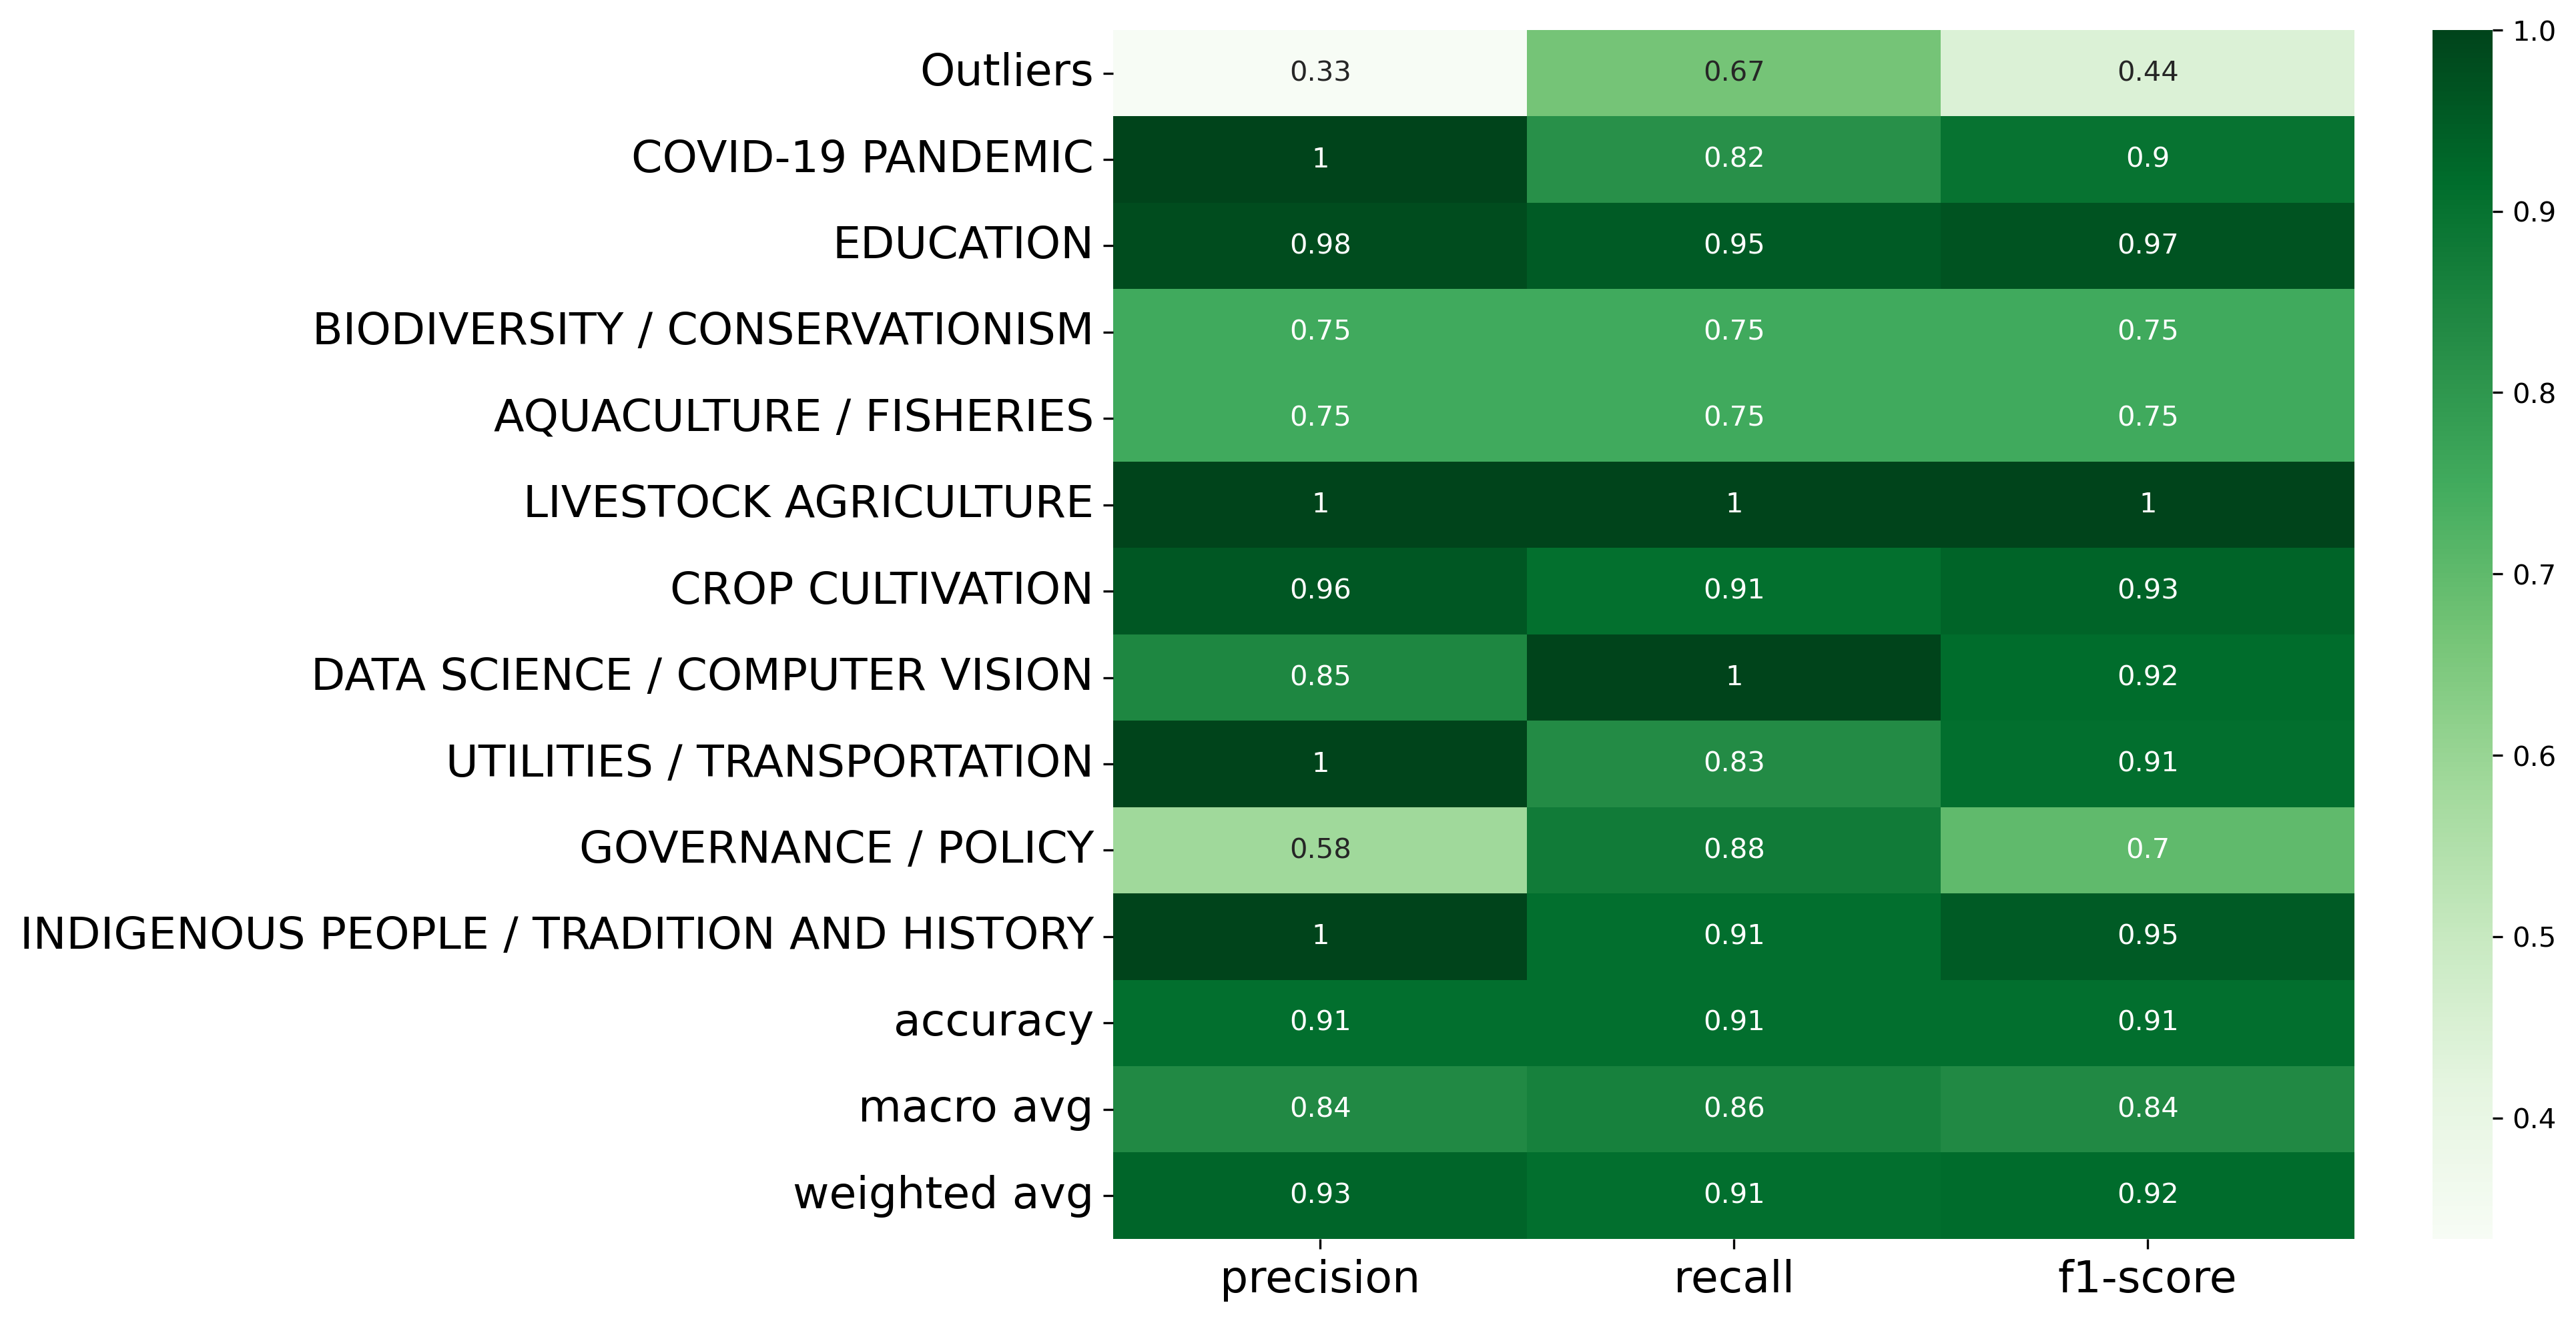

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('fig_data/df_topic_clf.pickle', 'rb') as f:
    df = pickle.load(f)

with open('fig_data/clf_report_topic.pickle', 'rb') as f:
    clf_report = pickle.load(f)
    
topic_mapping = (df[['Topic', 'Topic Name']].drop_duplicates()
                  .set_index('Topic').to_dict()['Topic Name'])

plt.figure(figsize=(10, 8), dpi=300)

clf_report_df = pd.DataFrame(clf_report).iloc[:-1, :].T
clf_report_df.index = [topic_mapping[int(col)] 
                       if col not in ['accuracy', 'macro avg', 'weighted avg'] 
                       else col for col in clf_report_df.index]

sns.heatmap(clf_report_df, annot=True, cmap='Greens')
axes = plt.gca()
axes.tick_params(axis='x', labelsize=16)
axes.tick_params(axis='y', labelsize=16);

## Network Analysis

**Figure 38** <br>

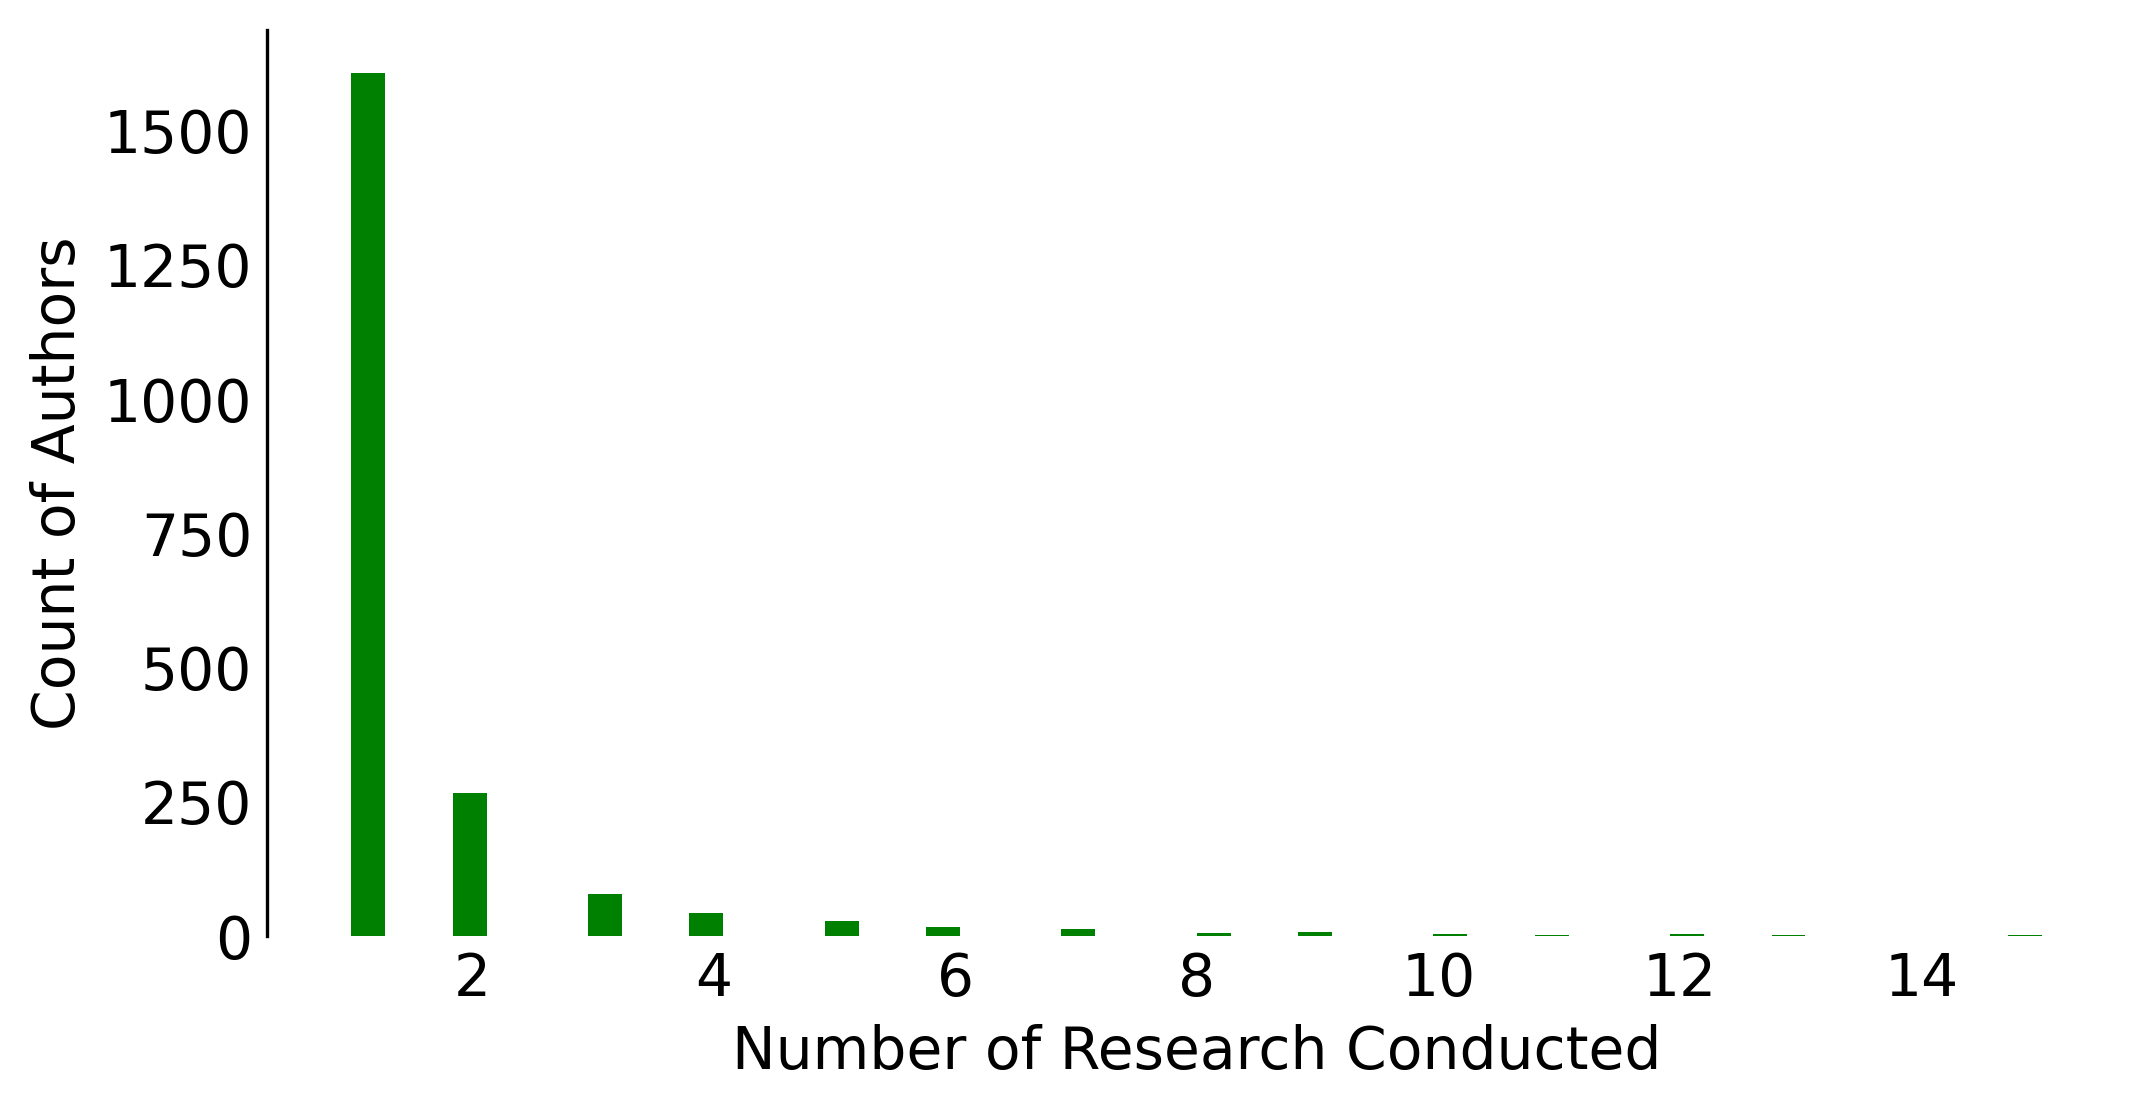

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('fig_data/res_prop.pickle', 'rb') as f:
    res_prop = pickle.load(f)

plt.figure(figsize=(8,4), dpi=300)    
authors = res_prop.Author.str.split(';').explode()
# remove empty string
authors = authors[authors != '']
# plot histogram
auth_vals = authors.value_counts()
auth_vals.plot.hist(bins=50, color='green')
plt.tick_params(axis='both', which='both', length=0)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
# plt.title('Histogram of Number of Research performed by each Author')
plt.xlabel('Number of Research Conducted', fontsize=14)
plt.ylabel('Count of Authors', fontsize=14);

axes = plt.gca()
axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14);

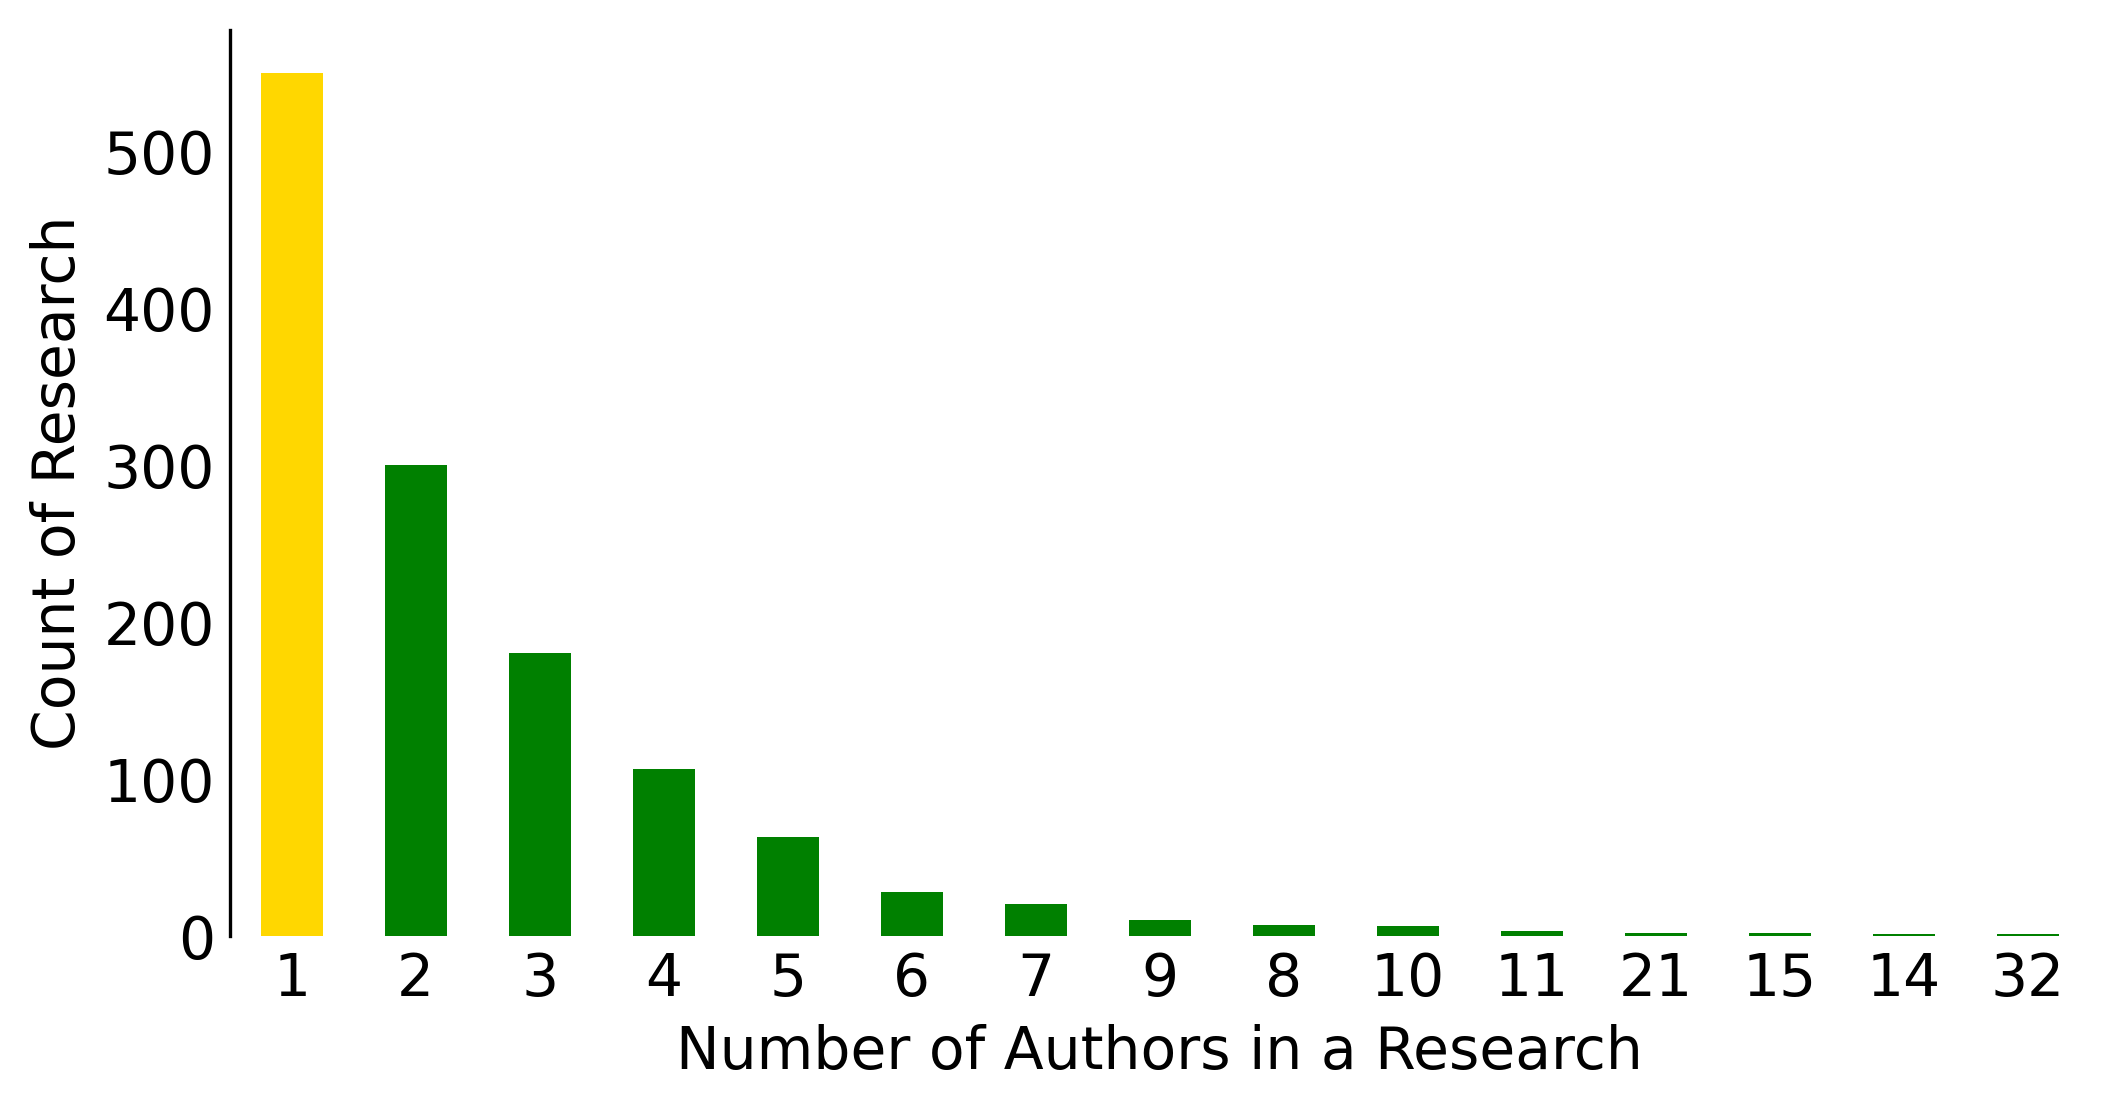

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('fig_data/res_prop.pickle', 'rb') as f:
    res_prop = pickle.load(f)

coauthor = res_prop.Author.str.split(';').apply(lambda x: [i for i in x if i])
coauthor = pd.DataFrame(coauthor)
coauthor['length'] = coauthor['Author'].str.len()
plt.figure(figsize=(8,4), dpi=300)
(coauthor['length'].value_counts()
                   .plot.bar(color=['gold']+ 
                           ['green'] 
                           * (len(coauthor['length'].value_counts()) - 1)))
plt.tick_params(axis='both', which='both', length=0)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.xlabel('Number of Authors in a Research', fontsize=14);
plt.ylabel('Count of Research', fontsize=14);
plt.xticks(rotation = 0)

axes = plt.gca()
axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14);